In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def compute_angular_momentum(r, v):
    return np.cross(r, v)

def compute_eccentricity(r, v, m, G):
    r = np.sqrt(np.sum(r**2))
    v = np.sqrt(np.sum(v**2))
    return 1./(2/r - v**2/(G*m))

def compute_eccentricity2(r, v, m, G):
    L = compute_angular_momentum(r, v)
    rabs = np.sqrt(np.sum(r**2))
    vL = np.cross(v, L)
    print(vL)
    e = 1./(G*m) * vL - r/rabs
    return e

In [33]:
r = np.random.uniform(-1,1,size=3)*1.4e11
v = np.random.uniform(-1,1,size=3)*100*1.4e11

In [34]:
m = 1e30
G = 6.67e-11

In [35]:
compute_eccentricity(r, v, m, G)

-4.6866088352442313e-07

In [36]:
e = compute_eccentricity2(r, v, m, G)
print(e)

[ 8.08344136e+36 -1.12434031e+37 -1.76074879e+37]
[ 1.21191025e+17 -1.68566763e+17 -2.63980329e+17]


In [37]:
np.sqrt(np.sum(e**2))

3.358386995655123e+17

In [13]:
def generate_kepler_orbit(times, num_orbits, semi_major_axes, eccentricities, inclinations):
    # Constants
    G = 6.67430e-11  # gravitational constant (m^3 kg^-1 s^-2)
    M = 1.989e30     # mass of the sun (kg)
    
    # Generate initial conditions for Keplerian orbits
    positions = []
    velocities = []

    for i in range(num_orbits):
        # Semi-major axis (in meters)
        a = semi_major_axes[i]

        # Eccentricity
        e = eccentricities[i]

        # Inclination (angle in radians)
        inclination = inclinations[i]

        # Orbital period (Kepler's third law)
        period = np.sqrt(4 * np.pi**2 * a**3 / (G * M))

        # Generate an array of time points covering one orbit
        #times = np.linspace(0, period, 1000)

        # Calculate mean anomaly
        mean_anomaly = 2 * np.pi * times / period

        # Solve Kepler's equation for eccentric anomaly
        eccentric_anomaly = np.arctan2(np.sqrt(1 - e**2) * np.sin(mean_anomaly), e + np.cos(mean_anomaly))

        # Calculate true anomaly
        true_anomaly = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(eccentric_anomaly / 2), np.sqrt(1 - e) * np.cos(eccentric_anomaly / 2))

        # Generate polar coordinates in the orbital plane
        r = a * (1 - e**2) / (1 + e * np.cos(true_anomaly))
        theta = true_anomaly + inclination

        # Convert polar coordinates to Cartesian coordinates
        x = r * np.cos(theta)
        y = r * np.sin(theta)

        # Calculate radial velocity
        v_r = np.sqrt(G * M * (2 / r - 1 / a))

        # Calculate tangential velocity
        v_t = np.sqrt(2 * G * M / r - G * M / a)

        # Convert polar velocities to Cartesian velocities
        vx = v_r * np.cos(theta) - v_t * np.sin(theta)
        vy = v_r * np.sin(theta) + v_t * np.cos(theta)

        # Append positions and velocities
        positions.append(np.array([x, y, np.zeros(np.shape(x))]))
        velocities.append(np.array([vx, vy, np.zeros(np.shape(x))]))

    return positions, velocities

In [ ]:
def compute_energy()

In [122]:
num_orbits = 20
semi_major_axes = np.random.uniform(0.1e11,10e11, size=num_orbits)
eccentricities = np.random.uniform(0.0,0.9, size=num_orbits)
inclinations = np.linspace(0.0,np.pi,num_orbits)
orbits = generate_kepler_orbit(
    num_orbits, 
    semi_major_axes, 
    eccentricities, 
    inclinations)

In [123]:
semi_major_axes

array([2.39021278e+11, 7.10128097e+11, 8.09062073e+11, 6.36491650e+11,
       8.28497138e+11, 3.96306136e+11, 7.13375674e+11, 6.79768489e+11,
       5.19051039e+11, 1.50696489e+11, 4.09001339e+11, 9.27039040e+11,
       8.83292612e+11, 4.05413849e+11, 5.20825004e+11, 6.69476275e+11,
       8.35751431e+11, 6.59339831e+11, 5.53853157e+11, 9.77662405e+11])

In [124]:
inclinations

array([0.        , 0.16534698, 0.33069396, 0.49604095, 0.66138793,
       0.82673491, 0.99208189, 1.15742887, 1.32277585, 1.48812284,
       1.65346982, 1.8188168 , 1.98416378, 2.14951076, 2.31485774,
       2.48020473, 2.64555171, 2.81089869, 2.97624567, 3.14159265])

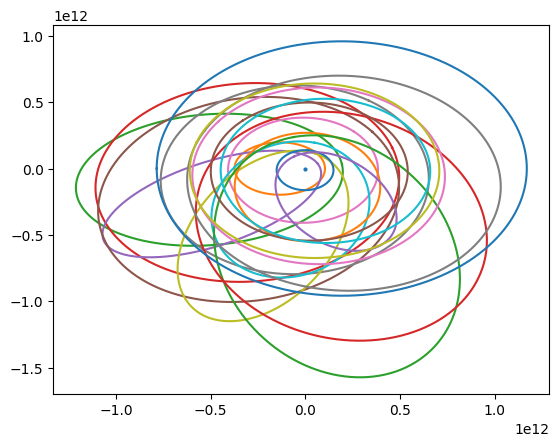

In [125]:
fig, ax = plt.subplots()
ax.plot(0,0,marker="o", ms=2)
for ind in range(num_orbits):
    ax.plot(orbits[0][ind][0], orbits[0][ind][1])